In [34]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pandas as pd
import numpy as np

import statsmodels.api as sm1 #Usa OLS com X como matriz de planejamento
import statsmodels.formula.api as sm  #Usa OLS como no R

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\dell\Documents\Insper\2º Semestre\Ciência dos Dados DP\Projeto 5


In [35]:
dados = pd.read_excel('urban.xlsx',sep=',')

In [36]:
dados.shape

(180, 3)

In [37]:
dados= dados[~np.isnan(dados.Diox)]
dados = dados[~np.isnan(dados.Urban)]
dados = dados[~np.isnan(dados.Suic)]
dados.shape

(180, 3)

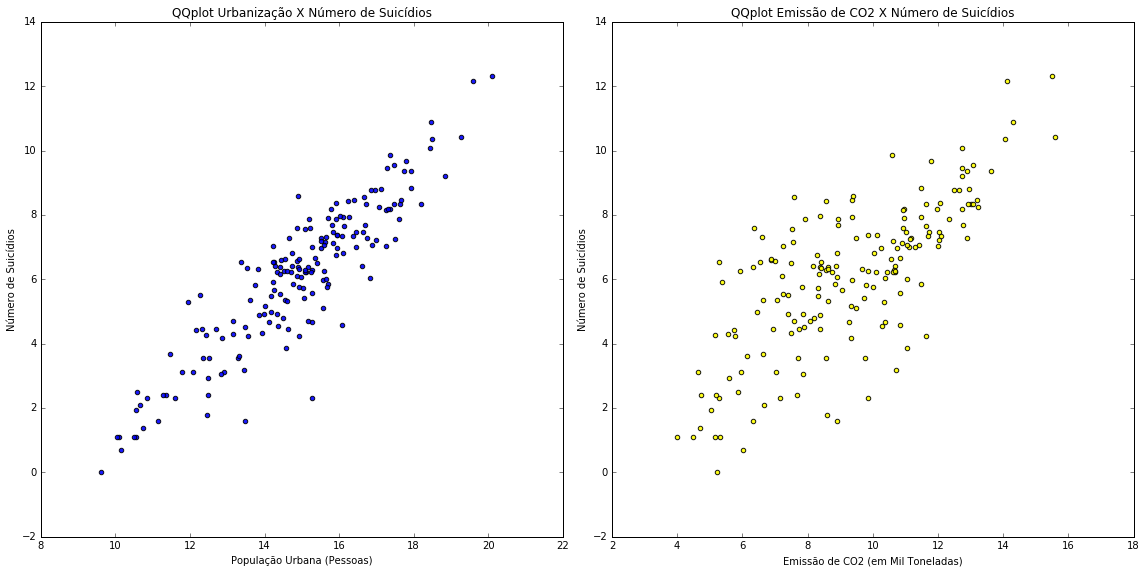

In [38]:
f, (a1, a2) = plt.subplots(1,2,figsize=(16,8))

a1.scatter( np.log(dados.Urban), np.log(dados.Suic), alpha=0.9, c='Blue')
a1.set_title("QQplot Urbanização X Número de Suicídios")
a1.set_xlabel('População Urbana (Pessoas)')
a1.set_ylabel('Número de Suicídios')
                
a2.scatter( np.log(dados.Diox), np.log(dados.Suic), alpha=0.9, c='yellow')
a2.set_title('QQplot Emissão de CO2 X Número de Suicídios')
a2.set_xlabel('Emissão de CO2 (em Mil Toneladas)')
a2.set_ylabel('Número de Suicídios')


plt.tight_layout(1)

PatsyError: Error evaluating factor: NameError: name 'Urban' is not defined
    Diox ~ Urban + Suic
           ^^^^^

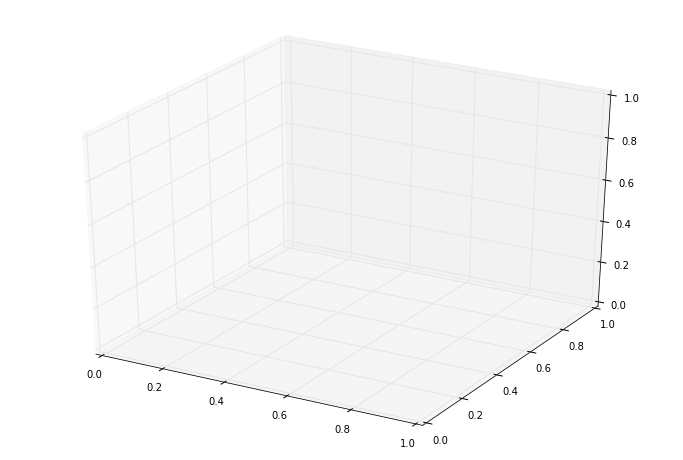

In [65]:
#Linear Regression - PRIMEIRA MANEIRA DE FAZER REGRESSÃO USANDO PACOTE ols
#Escreve modelo como no R

model = sm.ols(formula='Diox ~ Urban + Suic', data = dados)
fit = model.fit()
fit.summary()

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(0, 100, 2)                # generate a mesh
y_surf = np.arange(0, 10, 0.5)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'Diox': x_surf.ravel(), 'Suic': y_surf.ravel()})
out = fit.predict(exog = exog)
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.1)

ax.scatter(dados['Diox'], dados['Suic'], dados['Urban'],
           c='blue',
           marker='o',
           alpha=0.7)

ax.set_xlim(0,100)
ax.set_ylim(0,10)
ax.set_xlabel('Emissões de CO2 (em Mil Toneladas)')
ax.set_ylabel('Número de Suicídios')
ax.set_zlabel('Número de Habitantes Urbanos')

In [67]:
#Linear Regression - SEGUNDA MANEIRA DE FAZER REGRESSÃO USANDO PACOTE ols
#Informando X como matriz de planejamento

#Montagem dos dados
y=dados.Suic
X=dados.iloc[:,(0,2)]
X=sm1.add_constant(X)  # Adds a constant term to the predictor
X.head()

model=sm1.OLS(y, X)
fit=model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Suic   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     679.8
Date:                Thu, 01 Jun 2017   Prob (F-statistic):           8.61e-84
Time:                        23:50:33   Log-Likelihood:                -1862.1
No. Observations:                 180   AIC:                             3730.
Df Residuals:                     177   BIC:                             3740.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const      -2221.0475    595.312     -3.731      0.000     -3395.871 -1046.224
Urban          0.0005   2.03e-05     24.964      0.000         0.000     0.001
Diox          -0.0117      0.002     -6.706      0.000        -0.015    -0.008
==============================================================================
Omnibus:                      151.420   Durbin-Watson:                   2.168
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6459.422
Skew:                          -2.594   Prob(JB):                         0.00
Kurtosis:                      31.885   Cond. No.                     5.80e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.8e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
#Teste de White
#ver link https://pt.wikipedia.org/wiki/Teste_de_White
#y estimados
y_hat = fit.predict(X)

#Resíduos quadráticos
res2=(y-y_hat)**2

sm1.stats.diagnostic.het_white(res2,X)

(71.2550559760098,
 1.2330162488868777e-14,
 28.667159902741762,
 2.5197739192552225e-18)